<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Regresión Lineal
* Regularización
* Selección de Características
* Reducción de Dimensionalidad


# Parte 1. Pregunta de Investigación


> **2. Regresión Lineal:** Al entrenar un modelo de regresión lineal con pocos ejemplos y muchas características ($d > n$), la varianza de los estimadores de mínimos cuadrados aumenta y de consecuencia aumenta también la varianza de las predicciones que hace el modelo obtenido.


In [ ]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder

## Databases

### UJIIndoorLoc Dataset

[UJIIndoorLoc Data Set](https://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc)

In [ ]:
df = pd.read_csv("datasets/UJIndoorLoc/trainingData.csv")
df.drop(["FLOOR", "BUILDINGID", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], axis= 1, inplace= True)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7541.2643,4.864921e+06
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7536.6212,4.864934e+06
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,-7519.1524,4.864950e+06
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7524.5704,4.864934e+06
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7632.1436,4.864982e+06


In [ ]:
df = df.replace(100,-105)

scaler = MinMaxScaler()
scaler.fit(df)
loc = pd.DataFrame(scaler.fit_transform(df.sample(n=520, random_state=1)), columns=df.columns)

y = loc[["LONGITUDE", "LATITUDE"]]
X = loc.drop(["LONGITUDE", "LATITUDE"], axis= 1)

#135461 columnas(originalmente 520)
poly = PolynomialFeatures(2, interaction_only=True)
X = pd.DataFrame(poly.fit_transform(X))

X.head()

,0,1,2,3,4,5,6,7,8,9,...,135451,135452,135453,135454,135455,135456,135457,135458,135459,135460
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Columns: 135461 entries, 0 to 135460
dtypes: float64(135461)
memory usage: 537.4 MB


In [ ]:
clases = ["LONGITUDE", "LATITUDE"]
varianzas_medias = [[],[]]
cols = range(200, 2500, 100)

for n_col in cols:
    for i in range(2):
        y_i = y[clases[i]]
        X_i = X.iloc[: , :n_col]
        
        X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=0.2, shuffle= False)

        reg = LinearRegression().fit(X_train, y_train)
        R2 = reg.score(X_test, y_test)
        
        v = (1 - R2) * y_test.var()
        
        varianzas_medias[i].append(v)

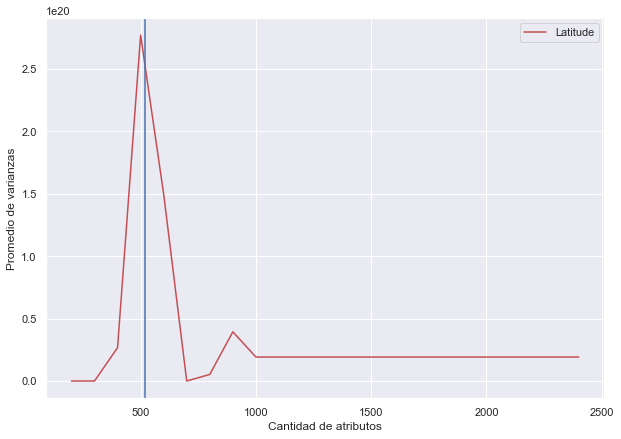

In [ ]:
plt.figure(figsize=(10,7))

# Plot the data
plt.plot(cols, varianzas_medias[1], 'r', label='Latitude')
plt.axvline(x= 520)

# Add a legend
plt.legend()

plt.xlabel("Cantidad de atributos")
plt.ylabel("Promedio de varianzas")

# Show the plot
plt.show()

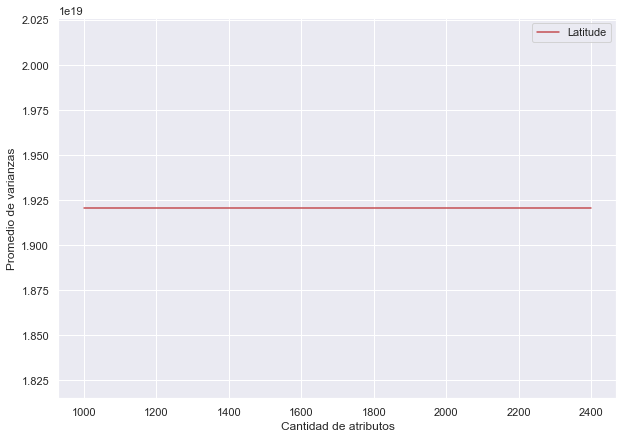

In [ ]:
plt.figure(figsize=(10,7))

# Plot the data
plt.plot(cols[cols.index(1000):], varianzas_medias[1][cols.index(1000):], 'r', label='Latitude')

# Add a legend
plt.legend()

plt.xlabel("Cantidad de atributos")
plt.ylabel("Promedio de varianzas")

# Show the plot
plt.show()

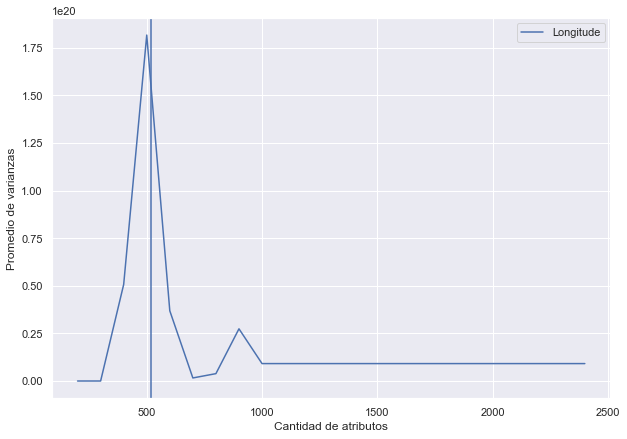

In [ ]:
plt.figure(figsize=(10,7))

# Plot the data
plt.plot(cols, varianzas_medias[0], 'b', label='Longitude')
plt.axvline(x= 520)

# Add a legend
plt.legend()

plt.xlabel("Cantidad de atributos")
plt.ylabel("Promedio de varianzas")

# Show the plot
plt.show()

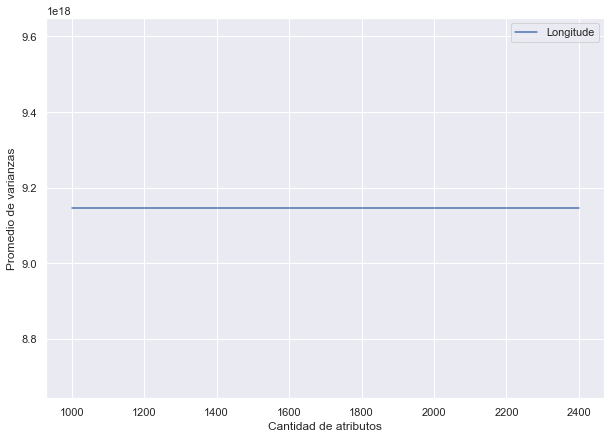

In [ ]:
plt.figure(figsize=(10,7))

# Plot the data
plt.plot(cols[cols.index(1000):], varianzas_medias[0][cols.index(1000):], 'b', label='Longitude')

# Add a legend
plt.legend()

plt.xlabel("Cantidad de atributos")
plt.ylabel("Promedio de varianzas")

# Show the plot
plt.show()

In [ ]:
""" X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test)) """

' X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)\nreg = LinearRegression().fit(X_train, y_train)\nprint(reg.score(X_test, y_test)) '

### Crime dataset

[Communities and Crime Unnormalized Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized)

In [ ]:
crime_df = pd.read_csv("datasets/CommViolPredUnnormalizedData.txt")
crime_df.head()

,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.1,1.37,91.78,6.5,...,14.1,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
0,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
1,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
2,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
3,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
4,Springfieldcity,MO,?,?,1,140494,2.45,2.51,95.65,0.90,...,2094,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42


In [ ]:
crime_df.nunique()

BerkeleyHeightstownship    2017
NJ                           48
39                          115
5320                        959
1                            10
                           ... 
131.26                     2172
2                           179
16.41                      1577
41.02                      1973
1394.59                    2113
Length: 147, dtype: int64

### House prices dataset 

In [ ]:
price = pd.read_csv("datasets/house_prices_train.csv")
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
lb = LabelEncoder()


for index, val in price.nunique().iteritems():
    #print(index, val)
    if val < 26:
        price[index] = lb.fit_transform(price[index])
        
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,11,2,8,4,250000


In [ ]:
samp = price.sample(n=500, random_state=1)

X = samp.drop("SalePrice", axis= 1)
y = samp["SalePrice"]

In [ ]:
X["LotFrontage"] = X["LotFrontage"].fillna( (X["LotFrontage"].mean()) )
X["MasVnrArea"] = X["MasVnrArea"].fillna( (X["MasVnrArea"].mean()) )
X["GarageYrBlt"] = X["GarageYrBlt"].fillna( (X["GarageYrBlt"].mean()) )

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 258 to 220
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             500 non-null    int64  
 1   MSSubClass     500 non-null    int64  
 2   MSZoning       500 non-null    int32  
 3   LotFrontage    500 non-null    float64
 4   LotArea        500 non-null    int64  
 5   Street         500 non-null    int32  
 6   Alley          500 non-null    int32  
 7   LotShape       500 non-null    int32  
 8   LandContour    500 non-null    int32  
 9   Utilities      500 non-null    int32  
 10  LotConfig      500 non-null    int32  
 11  LandSlope      500 non-null    int32  
 12  Neighborhood   500 non-null    int32  
 13  Condition1     500 non-null    int32  
 14  Condition2     500 non-null    int32  
 15  BldgType       500 non-null    int32  
 16  HouseStyle     500 non-null    int32  
 17  OverallQual    500 non-null    int64  
 18  OverallC

In [ ]:
poly = PolynomialFeatures(2, interaction_only=True)
X = pd.DataFrame(poly.fit_transform(X))
print(X.shape)

(500, 3241)


In [ ]:
varianzas_medias = []
cols = range(150, 3241, 100)

for n_col in cols:
    #print(n_col)
    X_i = X.iloc[: , :n_col]

    ols = sm.OLS(y.values, X_i)
    ols_result = ols.fit()
    std_errors = ols_result.bse
    sqr = np.square(std_errors)
    av = np.average(sqr)
    varianzas_medias.append(av)

In [ ]:
varianzas_medias = []
cols = range(750, 3241, 100)

for n_col in cols:
    #print(n_col)
    X_i = X.iloc[: , 1:n_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, test_size=0.2, shuffle= False)

    reg = LinearRegression().fit(X_train, y_train)
    R2 = reg.score(X_test, y_test)
    
    v = (1 - R2) * y_test.var()
    
    varianzas_medias.append(v)

No handles with labels found to put in legend.


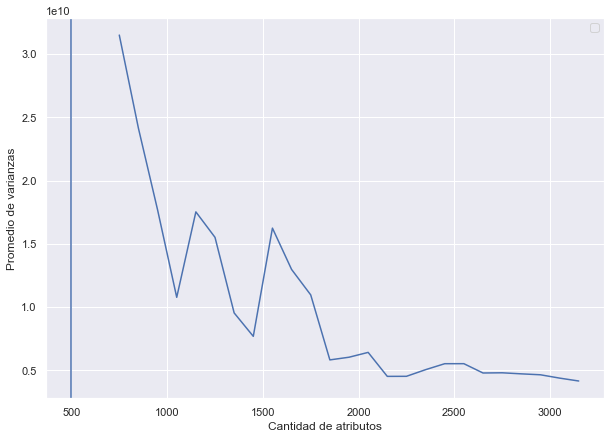

In [ ]:
plt.figure(figsize=(10,7))

# Plot the data
plt.plot(cols, varianzas_medias)
plt.axvline(x= 500)

# Add a legend
plt.legend()

plt.xlabel("Cantidad de atributos")
plt.ylabel("Promedio de varianzas")

# Show the plot
plt.show()

In [ ]:
y_test.var()

6181764126.212021

In [ ]:
np.var(np.array(y_test))

6119946484.949902

In [ ]:
np.var(list(y_test))

6119946484.949902

# Kaggle

### Parte 2. **Desafío Kaggle 
loc1= loc.drop("LATITUDE", axis= 1)
loc2= loc.drop("LONGITUDE", axis= 1)
datas = [(loc1, "LONGITUDE", "UJIndoorLoc longitude"), (loc2, "LATITUDE", "UJIndoorLoc latitude")]

Una de las paradojas más bizarras e interesantes de esta pandemia ha sido la masificación del concepto nómade digital: una persona, generalmente joven, que se pasa la vida viajando y trabajando de manera remota, a veces desde lugares inusuales y paradisíacos. En palabras de la multitud de personas que durante el último año se han sumado a este estilo de vida, la razón es tan simple como envidiable: "Si tenemos que trabajar en línea, ¿porqué no hacerlo desde un país exótico?".  

Para esta parte del taller, tendrán que constuir un modelo capaz de predecir el precio de un paquete de viajes orientado a nómades digitales a partir de una serie de detalles como el destino o itinerario, los hoteles y comidas incluídas, los vuelos involucrados, etc. 

Para acceder a loss detalles del desafío ingrese al siguiente link: https://www.kaggle.com/c/nomades-digitales/

